In [19]:
import glob
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Global plot settings
plt.rcParams.update({
    "font.size": 14,         # increase general font size
    "axes.labelsize": 20,    # axis label font size
    "axes.titlesize": 18,    # title font size
    "xtick.labelsize": 18,   # x tick labels
    "ytick.labelsize": 18,   # y tick labels
    "figure.dpi": 600,       # high-resolution figure
})

In [21]:
folder = 'results/SNRResults'

filepaths = glob.glob(f'{folder}/*.json')
filepaths

['results/SNRResults/Sub-14_Ses-01.json',
 'results/SNRResults/Sub-05_Ses-02.json',
 'results/SNRResults/Sub-11_Ses-01.json',
 'results/SNRResults/Sub-15_Ses-01.json',
 'results/SNRResults/Sub-05_Ses-01.json',
 'results/SNRResults/Sub-01_Ses-01.json',
 'results/SNRResults/Sub-06_Ses-01.json',
 'results/SNRResults/Sub-08_Ses-01.json',
 'results/SNRResults/Sub-02_Ses-01.json',
 'results/SNRResults/Sub-07_Ses-01.json',
 'results/SNRResults/Sub-12_Ses-01.json',
 'results/SNRResults/Sub-04_Ses-02.json',
 'results/SNRResults/Sub-04_Ses-01.json',
 'results/SNRResults/Sub-15_Ses-02.json',
 'results/SNRResults/Sub-09_Ses-01.json',
 'results/SNRResults/Sub-12_Ses-02.json',
 'results/SNRResults/Sub-13_Ses-02.json',
 'results/SNRResults/Sub-13_Ses-01.json',
 'results/SNRResults/Sub-03_Ses-01.json',
 'results/SNRResults/Sub-10_Ses-01.json',
 'results/SNRResults/Sub-09_Ses-02.json',
 'results/SNRResults/Sub-06_Ses-02.json']

In [22]:
subjects, sessions, overt_snr, covert_snr = [], [], [], []
for fp in filepaths:
    data = json.load(open(fp))
    subjects.append(data['subject_id'])
    sessions.append(data['session_id'])
    overt_snr.append(data['overt_snr_improvement_ratio'])
    covert_snr.append(data['covert_snr_improvement_ratio'])

In [23]:
data = pd.DataFrame({
    'Subject': subjects,
    'Session': sessions,
    'Overt SNR Improvement Ratio': overt_snr,
    'Covert SNR Improvement Ratio': covert_snr
})

In [24]:
data = data.sort_values(by=['Subject', 'Session'])
data.to_csv('results/SNR_improvement_summary.csv', index=False)

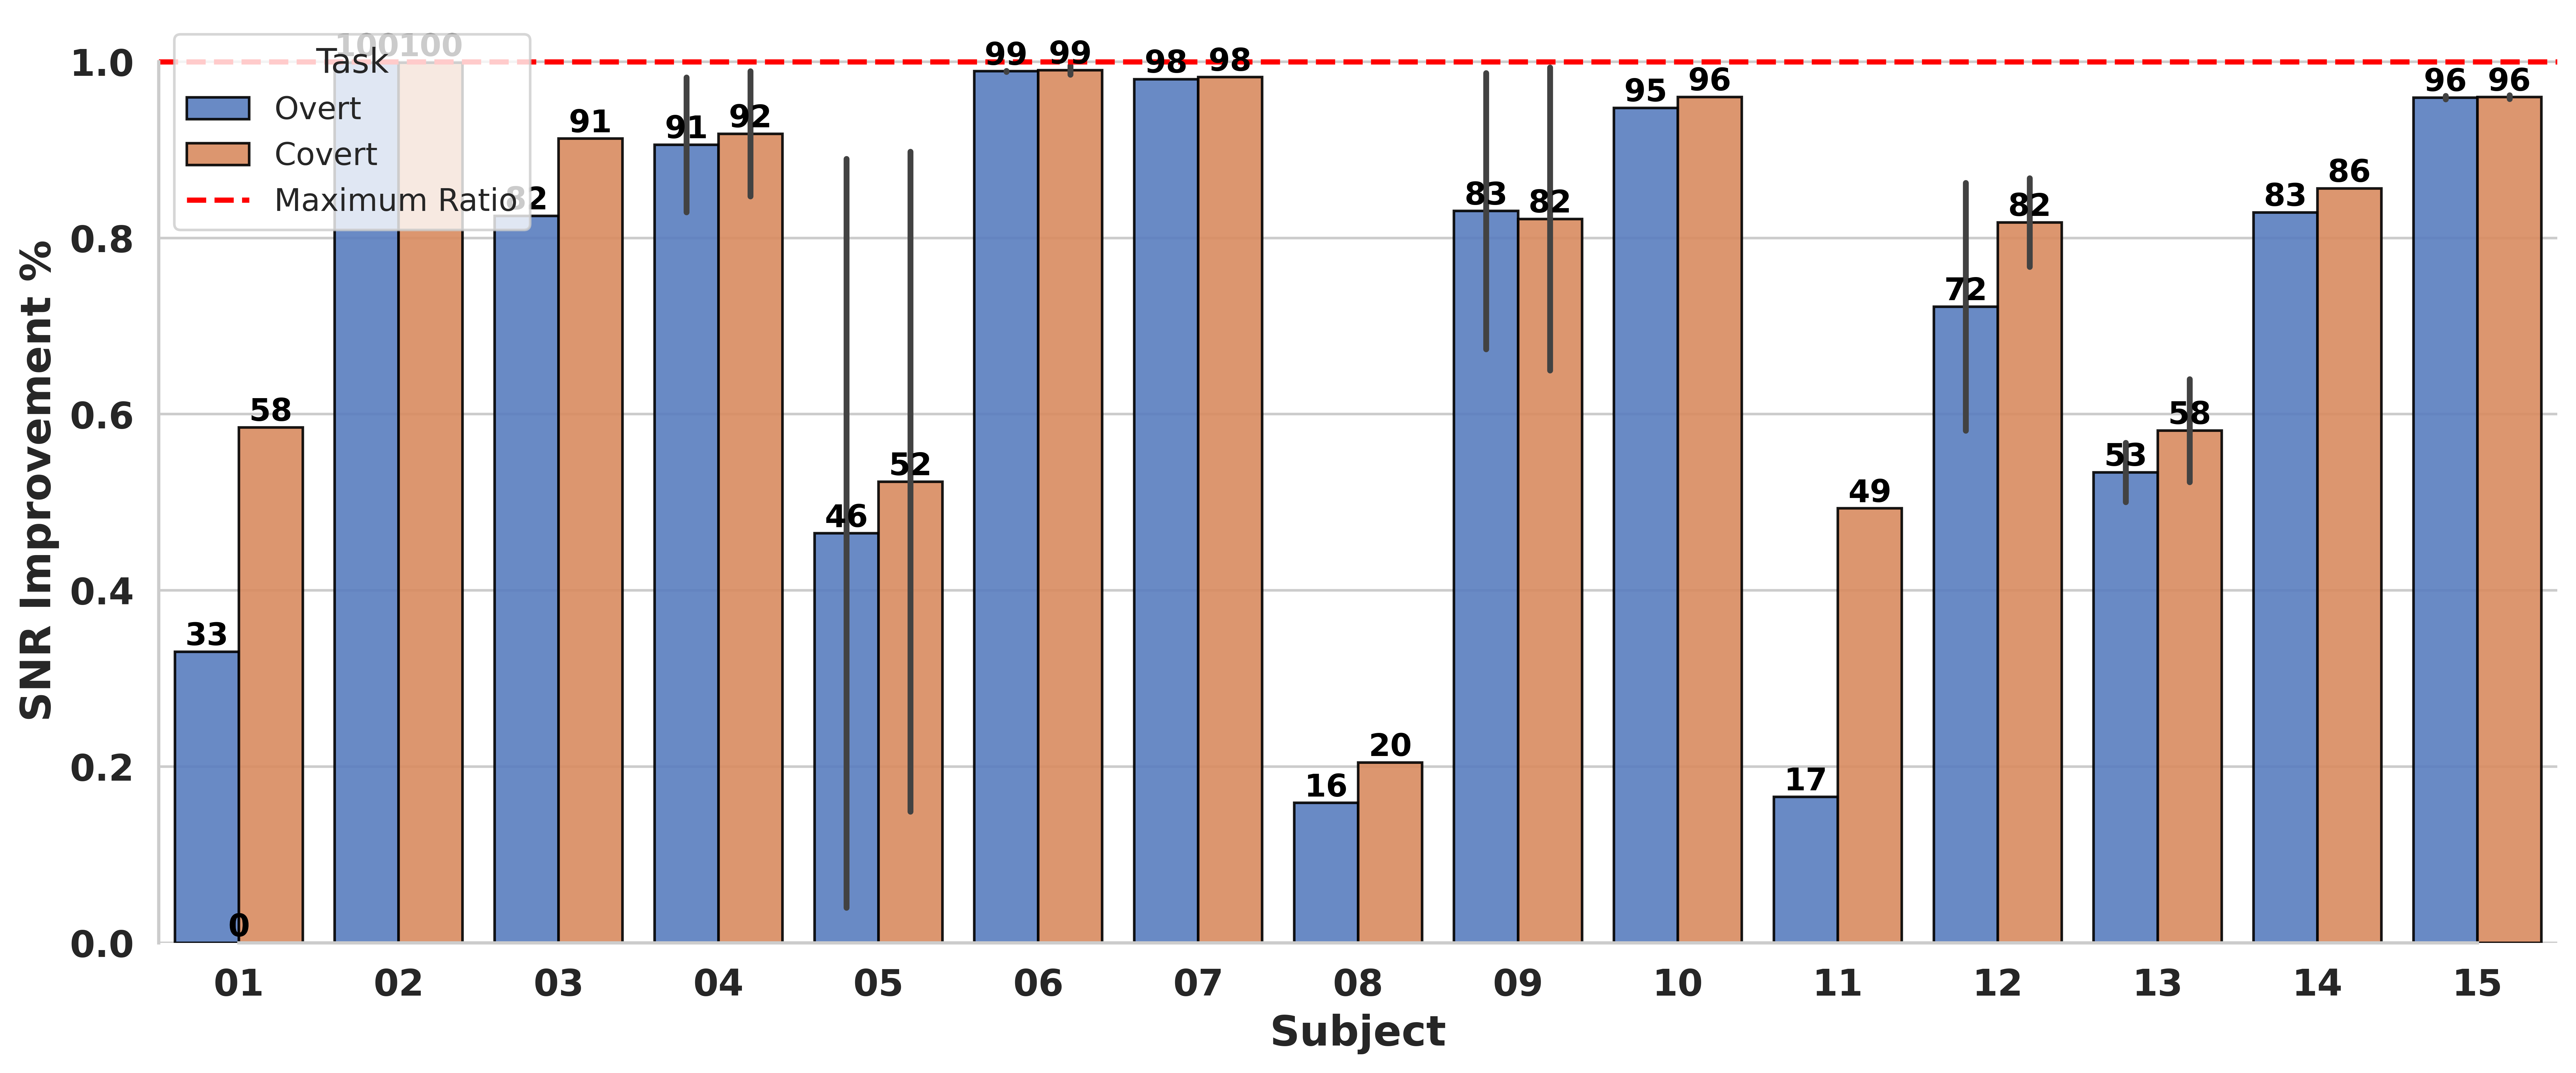

In [30]:


# Load your SNR results CSV
snr_df = data.copy()
# Melt for long format
snr_df_long = pd.melt(snr_df, id_vars=['Subject', 'Session'], 
                      value_vars=['Overt SNR Improvement Ratio', 'Covert SNR Improvement Ratio'],
                      var_name='Task', value_name='SNR_Ratio')
snr_df_long['Task'] = snr_df_long['Task'].str.replace(' SNR Improvement Ratio', '')


# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.3)

plt.figure(figsize=(14,6))
bar_plot = sns.barplot(
    data=snr_df_long, 
    x='Subject', 
    y='SNR_Ratio', 
    hue='Task', 
    edgecolor='black', 
    alpha=0.9
)

# Axis labels with bold font
bar_plot.set_xlabel('Subject', fontsize=16, fontweight='bold')
bar_plot.set_ylabel('SNR Improvement %', fontsize=16, fontweight='bold')

# Customize ticks
bar_plot.tick_params(axis='x', labelsize=14, labelrotation=0, width=2)
bar_plot.tick_params(axis='y', labelsize=14, width=2)

# Remove top and right spines
sns.despine(trim=True)

# Add maximum ratio line
bar_plot.axhline(1.0, color='red', linestyle='--', linewidth=2, label='Maximum Ratio')

# Annotate each bar with its value (bold)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height*100:.0f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', rotation=0)

# Legend on top left
plt.legend(title='Task', loc='upper left', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()



